In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.io as sio
import mtspec

In [184]:
# Load some NA data
szr_name='NA_d1_sz2'

# EEG data
in_file='/Users/davidgroppe/ONGOING/SZR_SPREAD/PATIENTS/NA/Data/'+szr_name+'.mat'
mat_contents = sio.loadmat(in_file)
print(mat_contents.keys())
eeg_bi=mat_contents['matrix_bi'].T
srate=mat_contents['Sf']
n_tpt=eeg_bi.shape[1]
tpts_sec=np.arange(n_tpt)/srate;
tpts_sec=tpts_sec[0,:] # Convert to vector for compatibility with plotting

# Channel Names
in_file='/Users/davidgroppe/ONGOING/SZR_SPREAD/PATIENTS/NA/NA_channel_info.csv'
chan_df=pd.read_csv(in_file,names=['ChanNames'])
# chan_df.head()
chan_labels=chan_df['ChanNames'].tolist()
chan_labels_cln=clean_labels(chan_labels)

dict_keys(['__header__', '__version__', 'group_end_index', 'matrix_mo', 'Sf', '__globals__', 'matrix_bi'])


In [137]:
# Get Clinical Onset
onset_csv='/Users/davidgroppe/Dropbox/TWH_INFO/ONSET_TIMES_CLINICAL/NA_clinical_onset_offset.csv'
onset_df=pd.read_csv(onset_csv)

# Convert times from strings to datetime:
dude=onset_df['ONSET']+' '+onset_df['DDMMYR']
onset_df['SZR_ONSET_DT']=pd.to_datetime(dude)
dude=onset_df['FILE_ONSET']+' '+onset_df['DDMMYR']
def none_onset(x):
    if x.startswith('?'):
        return None
    else:
        return x
dude=dude.apply(none_onset)
onset_df['FILE_ONSET_DT']=pd.to_datetime(dude)
onset_df['SZR_ONSET_DELTA']=onset_df['SZR_ONSET_DT']-onset_df['FILE_ONSET_DT']
onset_df.head()

,DAY,SZR#,ONSET,OFFSET,SOZ_CHAN,FILE_ONSET,DDMMYR,SRATE_HZ,NOTES,SZR_ONSET_DT,FILE_ONSET_DT,SZR_ONSET_DELTA
0,1,1,8:59:03 PM,9:38:35 PM,?,?,06/23/2009,500,?,2009-06-23 20:59:03,NaT,NaT
1,1,2,1:54:41 AM,1:55:52 AM,RHD1,1:52:45,06/23/2009,500,?,2009-06-23 01:54:41,2009-06-23 01:52:45,00:01:56
2,1,3,2:42:25 AM,2:43:58 AM,?,2:39:36,06/23/2009,500,?,2009-06-23 02:42:25,2009-06-23 02:39:36,00:02:49
3,1,4,4:51:59 AM,4:53:35 AM,?,4:49:03,06/23/2009,500,?,2009-06-23 04:51:59,2009-06-23 04:49:03,00:02:56
4,1,5,6:29:14 AM,6:31:11 AM,?,6:26:20,06/23/2009,500,?,2009-06-23 06:29:14,2009-06-23 06:26:20,00:02:54


In [210]:
def clean_labels(raw_labels):
    cln_labels=[]
    for lab in raw_labels:
        half1, half2=lab.split('-')
        new_label=[]
        new_label.append(half1)
        new_label.append('-')
        for c in half2:
            if c.isdigit():
                new_label.append(c)
        cln_labels.append(''.join(new_label))
    return cln_labels

def strat_plot(dat,chan_labels,fig_id=1,show_chan_ids=None,h_offset=2,srate=1,tpts_sec=None,fontsize=9):
    if show_chan_ids is None:
        show_chan_ids=np.arange(len(chan_labels))
    temp_dat=dat[show_chan_ids,:].copy()
    n_show_chan=len(show_chan_ids)
    n_tpt=temp_dat.shape[1]
    if tpts_sec is None:
        tpts_sec=np.arange(n_tpt)/srate;
    for a in range(n_show_chan):
        temp_dat[a,:]=temp_dat[a,:]-np.mean(temp_dat[a,:])+a*h_offset
    mn_y=np.min(temp_dat[0,:])
    mx_y=np.max(temp_dat[-1,:])
    h=plt.figure(fig_id)
    plt.clf()
    plt.plot(tpts_sec,temp_dat.T)
    plt.xlim(tpts_sec[0],tpts_sec[-1])
    plt.ylim(mn_y,mx_y)
    plt.xlabel('Seconds')
    plt.yticks(np.arange(n_show_chan)*h_offset)
    ax=h.axes[0]
    temp_chan_labels=np.array(chan_labels)
    ax.set_yticklabels(temp_chan_labels[show_chan_ids],fontsize=fontsize)
    return h, ax


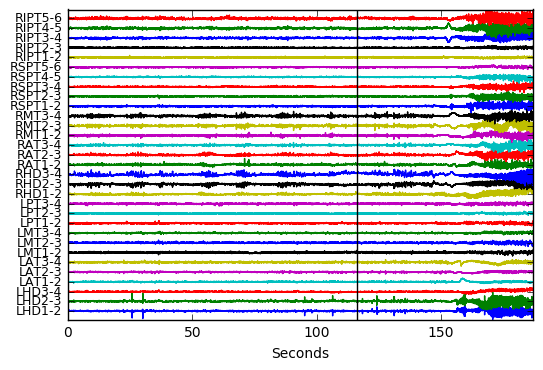

In [234]:
# Plot voltage traces
fig_h, ax_h=strat_plot(eeg_bi,chan_labels_cln,h_offset=2,srate=500,tpts_sec=tpts_sec)
clin_onset=onset_df.loc[1,'SZR_ONSET_DELTA'].seconds
# print(clin_onset)
# bro=fig_h.axes[0]
# ylim=bro.get_ylim()
ylim=ax_h.get_ylim()
plt.plot([clin_onset, clin_onset],ylim,'k-')

In [287]:
for a in range(len(chan_labels)):
    print('{}: {}'.format(a,chan_labels[a]))

0: LHD1-LHD2
1: LHD2-LHD3
2: LHD3-LHD4
3: LAT1-LAT2
4: LAT2-LAT3
5: LAT3-LAT4
6: LMT1-LMT2
7: LMT2-LMT3
8: LMT3-LMT4
9: LPT1-LPT2
10: LPT2-LPT3
11: LPT3-LPT4
12: RHD1-RHD2
13: RHD2-RHD3
14: RHD3-RHD4
15: RAT1-RAT2
16: RAT2-RAT3
17: RAT3-RAT4
18: RMT1-RMT2
19: RMT2-RMT3
20: RMT3-RMT4
21: RSPT1-RSPT2
22: RSPT2-RSPT3
23: RSPT3-RSPT4
24: RSPT4-RSPT5
25: RSPT5-RSPT6
26: RIPT1-RIPT2
27: RIPT2-RIPT3
28: RIPT3-RIPT4
29: RIPT4-RIPT5
30: RIPT5-RIPT6


In [294]:
def bp_pwr(data,srate,wind_len,wind_step,n_tapers,tpts_sec):
    n_chan, n_tpt=data.shape
    # ToDo: ignore DC and harmonics
    for chan in range(n_chan):
        sgram, f, sgram_sec=mt_sgram(eeg_bi[chan,:],srate,wind_len,wind_step,n_tapers,tpts_sec)
        if chan==0:
            n_wind=len(sgram_sec)
            db_pwr=np.zeros((n_chan,n_wind))
            # figure out which freqs to use
            use_ids=np.logical_and(f>50,f<200)
        db_pwr[chan,:]=np.mean(sgram[use_ids,:],axis=0)
    return db_pwr, sgram_sec
            

def mt_sgram(data,srate,wind_len,wind_step,n_tapers,time_sec):
    n_tpt=len(data)
    wind_cntr=np.arange(wind_len,n_tpt,wind_step)
    wind_len=int(np.round(wind_len))
    wind_step=int(np.round(wind_step))
    # Compute # of time windows
    n_wind=len(wind_cntr)
    
    # Compute # of frequencies
    cursor=0
    for wind in range(n_wind):
        spec, f=mtspec.multitaper.mtspec(data[cursor:cursor+wind_len],1/srate,n_tapers)
        if cursor==0:
            n_freq=len(f)
            sgram=np.zeros((n_freq,n_wind))
            sgram_sec=np.zeros(n_wind)
        sgram[:,wind]=10*np.log10(spec)
        sgram_sec[wind]=np.mean(time_sec[cursor:cursor+wind_len])
        cursor+=wind_step
    return sgram, f, sgram_sec


def mt_cohgram(data1,data2,srate,wind_len,wind_step,n_tapers,time_sec):
    n_tpt=len(data1)
    wind_cntr=np.arange(wind_len,n_tpt,wind_step)
    wind_len=int(np.round(wind_len))
    wind_step=int(np.round(wind_step))
    # Compute # of time windows
    n_wind=len(wind_cntr)
    
    # Compute # of frequencies
    cursor=0
    for wind in range(n_wind):
        mt_coh=mtspec.multitaper.mt_coherence(1/srate,data1[cursor:cursor+wind_len],
                                              data2[cursor:cursor+wind_len],
                                              (n_tapers+1)/2,n_tapers,100,0.95,
                                              freq=True,cohe=True,phase=True)
        f=mt_coh['freq']
        if cursor==0:
            n_freq=len(f)
            cohgram=np.zeros((n_freq,n_wind))
            cohgram_sec=np.zeros(n_wind)
        cohgram[:,wind]=mt_coh['cohe']
        cohgram_sec[wind]=np.mean(time_sec[cursor:cursor+wind_len])
        cursor+=wind_step
    return cohgram, f, cohgram_sec


def z_norm(data, time_sec, onset_sec):
    """ converts chan x time matrix to z-scores via baseline period"""
    # Note, I don't need to return anything because the variable is passed by reference
    n_chan, n_tpt=data.shape
    use_tpts=time_sec<onset_sec
    mn=np.mean(data[:,use_tpts],axis=1)
    sd=np.std(data[:,use_tpts],axis=1)
    for chan in range(n_chan):
        data[chan,:]=(data[chan,:]-mn[chan])/sd[chan]


In [249]:
# Compute high gamma power time series
db_pwr, sgram_sec=bp_pwr(eeg_bi,srate,srate,srate/2,4,tpts_sec)

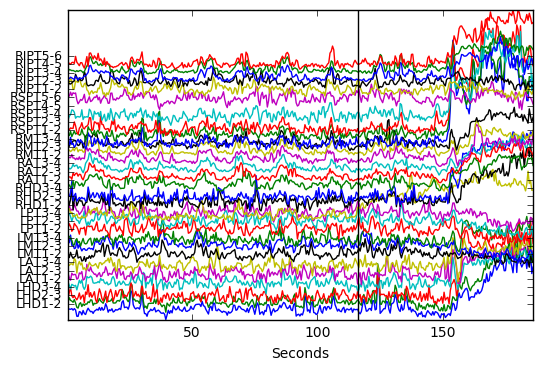

In [256]:
# Plot baseline-normalized high gamma power traces
z_norm(db_pwr,sgram_sec,clin_onset)
fig_h, ax_h=strat_plot(db_pwr,chan_labels_cln,h_offset=2,srate=500,tpts_sec=sgram_sec)
clin_onset=onset_df.loc[1,'SZR_ONSET_DELTA'].seconds
ylim=ax_h.get_ylim()
plt.plot([clin_onset, clin_onset],ylim,'k-')

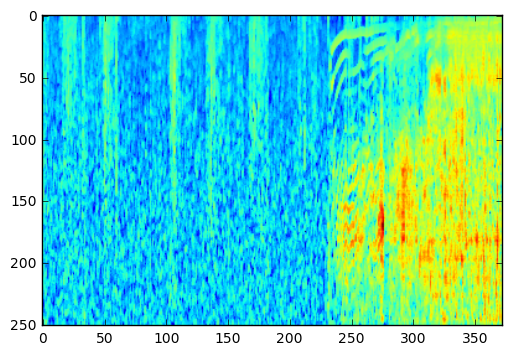

In [300]:
sgram, f, sgram_sec=mt_sgram(eeg_bi[12,:],srate,srate,srate/2,4,tpts_sec)
z_norm(sgram,sgram_sec,clin_onset)
plt.figure(2)
plt.imshow(sgram)
# plt.xticks(sgram_sec)
# plt.colorbar

In [303]:
wind_len=2*srate
cohgram, coh_f, cohgram_sec=mt_cohgram(eeg_bi[12,:],eeg_bi[0,:],srate,wind_len,wind_len/4,4,tpts_sec)

In [302]:
coh_f[-1]

249.99998

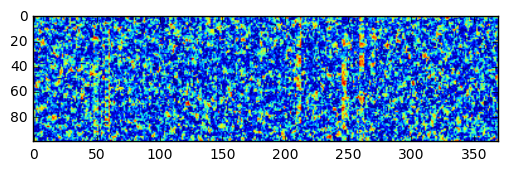

In [304]:
plt.figure(2)
plt.imshow(cohgram)
# plt.xticks(sgram_sec)
# plt.colorbar()

In [ ]:
# Compute PLV (or Coh) with RHD1-2


In [280]:
#mtspec.multitaper.mt_coherence(df, xi, xj, tbp, kspec, nf, p, **kwarg
mt_coh=mtspec.multitaper.mt_coherence(1/srate,eeg_bi[0,:int(srate)],eeg_bi[1,:int(srate)],
                                      4,2*4-1,100,0.95,freq=True,cohe=True,phase=True)

In [278]:
mt_coh['freq'][-1]

249.99997

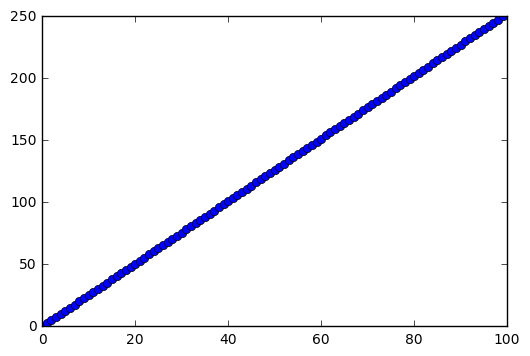

In [281]:
plt.figure(10)
plt.clf()
plt.plot(mt_coh['freq'],'-o')

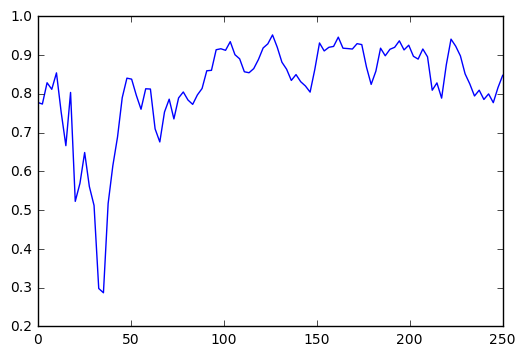

In [282]:
plt.figure(10)
plt.clf()
plt.plot(mt_coh['freq'],mt_coh['cohe'])

In [283]:
bro=mt_coh['phase']
bro.shape

(100,)

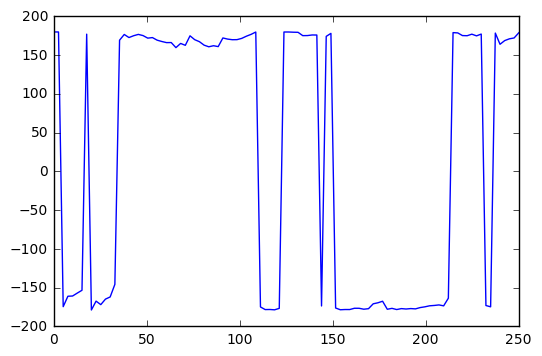

In [284]:
plt.figure(11)
plt.clf()
plt.plot(mt_coh['freq'],mt_coh['phase']) # Phase is in degrees